# Critical moment calculation using an artificial neural network

The model was developed in Couto, Carlos. "Neural network models for the critical bending moment of uniform and tapered beams." Structures. Vol. 41. Elsevier, 2022.

In [5]:
!curl -o pyrenn_ccversion.py -L https://raw.githubusercontent.com/ccouto/testecolab/main/pyrenn_ccversion.py
!curl -o scaler_y.txt -L https://raw.githubusercontent.com/ccouto/testecolab/main/scaler_y.txt
!curl -o scaler122.pkl -L https://raw.githubusercontent.com/ccouto/testecolab/main/scaler122.pkl
!curl -o 9_128_16_1_lm_v1.nn -L https://raw.githubusercontent.com/ccouto/testecolab/main/9_128_16_1_lm_v1.nn
!curl -o McrNet_helper.py -L https://raw.githubusercontent.com/ccouto/testecolab/main/McrNet_helper.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30567  100 30567    0     0  68645      0 --:--:-- --:--:-- --:--:-- 69000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0     31      0 --:--:-- --:--:-- --:--:--    31
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   868  100   868    0     0   2188      0 --:--:-- --:--:-- --:--:--  2197
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  192k  100  192k    0     0   442k      0 --:--:-- --:--:-- --:--:--  443k


In [1]:
from McrNet_helper import LoadNN, Calculate, Calculate_ResultOnly
model, model_scaler, u = LoadNN('9_128_16_1_lm_v1.nn')

![img](https://raw.githubusercontent.com/ccouto/testecolab/main/notation.png)

In [2]:
# input data in mm and kNm [see notation]
# change this:
hw1 = 450
hw2 = 650
tw = 5
bf1 = 250
tf1 = 12
bf2 = 150
tf2 = 10
L = 10000
M1 = 100
M2 = -40

#don't change this line
Calculate(hw1,hw2,tw,bf1,tf1,bf2,tf2,L,M1,M2,model,model_scaler,u)

Results:

alphacr= 4.166

Mcr= 416.625 kN.m

psi=-0.4


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mcr_train_origdisc_random_40000.csv',sep=",")

df.head()

,hw1,hw2,tw,bf1,tf1,bf2,tf2,psi,L,y_Mcr_u_eq
0,175.00,700.0,3.41,700.0,35.37,175.0,12.07,0.5,15400.0,5129.675897
1,250.00,500.0,3.23,250.0,10.79,500.0,6.84,1.0,14000.0,108.262904
2,666.67,1000.0,6.06,1000.0,35.79,500.0,6.06,0.5,18000.0,18677.874660
3,175.00,700.0,5.19,175.0,5.19,175.0,5.62,1.0,19600.0,11.134650
4,800.00,400.0,3.14,400.0,32.00,200.0,8.63,-0.5,27200.0,1559.648343


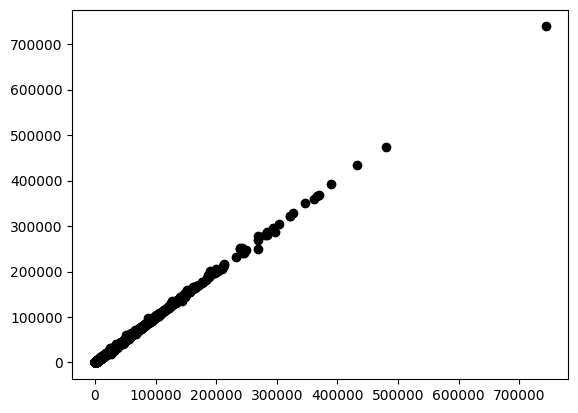

In [7]:
y_max=np.max(df.y_Mcr_u_eq)

y=np.zeros(len(df.y_Mcr_u_eq))
x=np.zeros(len(df.y_Mcr_u_eq))

for j in range(0,len(y)):
    x[j]=df.y_Mcr_u_eq[j]

    y[j] = Calculate_ResultOnly(df.hw1[j],df.hw2[j],df.tw[j],df.bf1[j],df.tf1[j],df.bf2[j],df.tf2[j],df.L[j], df.psi[j],model,model_scaler,u)

    #print('case:', x[j], y[j], x[j]/y[j])

plt.plot(x,y,'ok')


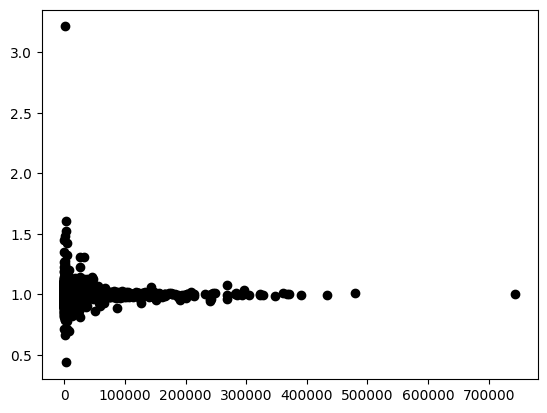

In [10]:
plt.plot(x,x/y,'ok')
